In [22]:
using FITSIO, FITSTables, DataFrames, PyPlot, PyCall
LogNorm = pyimport("matplotlib.colors").LogNorm
;

In [3]:
lamost = FITS(f->DataFrame(f[2]), "../cats/LAMOST-dr5-v3-stellar.fits.gz");

In [4]:
df = FITS(f->DataFrame(f[2]), "random_30000_test.classified.fits")
df = join(df, lamost[:, [:obsid, :teff, :feh, :logg, :snrz, :designation]], on=:obsid, kind=:left)
;

In [54]:
df.match = df.isline .& (df.amplitude .> 0.01) #.& (df.delta_chi2 .> 5);

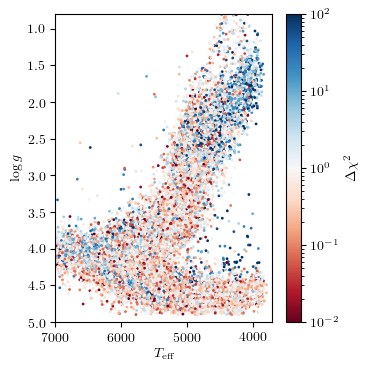

In [55]:
figure(figsize=(3.5, 4))

plt.hist2d(df.teff, df.logg, cmap="bone_r", bins=50, zorder=-1, alpha=0.5)
scatter(df[df.match, :teff], df[df.match, :logg], s=1, c=df[df.match, :delta_chi2], cmap="RdBu", norm=LogNorm(), vmin=1e-2, vmax=1e2)
colorbar(label=L"\Delta \chi^2")
gca().invert_yaxis()
gca().invert_xaxis()
xlim(7000, 3700)
ylim(5, 0.8)
xlabel(L"T_\mathrm{eff}")
ylabel(L"\log g")
savefig("../../Desktop/kiel2.pdf", bbox_inches="tight")

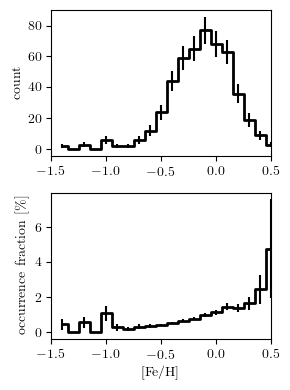

In [35]:
using StatsBase
fehbins=-1.5:0.1:0.5

gmatch = df.match .& (df.logg .< 3)

axs = subplots(2, 1, figsize=(3,4))[2]

h = fit(Histogram, df[gmatch, :feh], fehbins)
h2 = fit(Histogram, df[df.logg .< 3, :feh], fehbins)
midpoints = h.edges[1][1:end-1] + diff(h.edges[1])

sca(axs[1])
plt.errorbar(midpoints, h.weights, sqrt.(h.weights), ls="", c="k")
plt.step(midpoints, h.weights, where="mid", lw=2, c="k")
ylabel("count")
xlim(-1.5, 0.5)

sca(axs[2])
plt.errorbar(midpoints, h.weights./h2.weights * 100, 
    sqrt.(h.weights .+ h.weights.^2 ./ h2.weights)./h2.weights * 100, ls="", c="k")
plt.step(midpoints, h.weights./h2.weights * 100 , lw=2, where="mid", c="k")
ylabel("occurrence fraction [\\%]")
xlabel("[Fe/H]")
xlim(-1.5, 0.5)
tight_layout()
savefig("../../Desktop/occurance_rate.pdf", bbox_inches="tight")